# Clean and Analyze Employee Exit Surveys

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The following is to be determined (End Goal):

__1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?__

__2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?__

_Below is a preview of a couple columns we'll work with from the dete_survey.csv:_

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE
---
_Below is a preview of a couple columns we'll work with from the tafe_survey.csv:_

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

### Exploring the dataframes:

`dete_survey` dataframe

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
print("Number of null values in each column:")
print(dete_survey.isnull().sum())
dete_survey.head()

Number of null values in each column:
ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel    

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


`tafe_survey` dataframe

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
print("Number of null values in each column:")
tafe_survey.isnull().sum()
tafe_survey.head()

Number of null values in each column:


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can first make the following observations:

1. The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
2. Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
3. Each dataframe contains many of the same columns, but the column names are different.
4. There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Cleaning the dataframes:

In [7]:
#confronting 'Not Stated' values
dete_survey=pd.read_csv("dete_survey.csv", na_values='Not Stated')

#removing irrelevant columns that are not needed for our analysis:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])
print("No. of columns left in 'dete_survey' file:",dete_survey_updated.shape[1])
print("No. of columns left in 'tafe_survey' file:",dete_survey_updated.shape[1])

No. of columns left in 'dete_survey' file: 35
No. of columns left in 'tafe_survey' file: 35


In [8]:
#standardizing the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
print(dete_survey_updated.columns)

#renaming certain columns
tafe_survey_cols_rename={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}

tafe_survey_updated.rename(columns=tafe_survey_cols_rename, inplace=True)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

### Filtering the dataframes:

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Hence we shall extract those participants that have their `separationtype` column datapoint containing the string 'Resignation'

In [9]:
dete_survey_updated['separationtype'].value_counts()

dete_resignations = dete_survey_updated.copy().loc[dete_survey_updated['separationtype'].str.match(r"\bResignation")]
dete_resignations['separationtype'].unique()

array(['Resignation-Other reasons', 'Resignation-Other employer',
       'Resignation-Move overseas/interstate'], dtype=object)

In [10]:
tafe_survey_updated['separationtype'].value_counts()

tafe_resignations = tafe_survey_updated.copy().loc[tafe_survey_updated['separationtype']=='Resignation']
tafe_resignations['separationtype'].unique()

array(['Resignation'], dtype=object)

### Verifying the dataframes:

We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.


In [11]:
# 'dete_resignations' dataframe
print(dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=True))
print(dete_resignations['cease_date'].dtype)
dete_resignations['cease_date']=dete_resignations['cease_date'].str[-4:].astype(float)
print('\n')
print(dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=True))
print(dete_resignations['cease_date'].dtype)

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
NaN         11
Name: cease_date, dtype: int64
object


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64
float64


In [12]:
print(dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=True))

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64


In [13]:
# 'tafe_resignations' dataframe
print(tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=True))

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64


array([<AxesSubplot:title={'center':'dete_start_date'}, xlabel='separationtype'>,
       <AxesSubplot:title={'center':'cease_date'}, xlabel='separationtype'>],
      dtype=object)

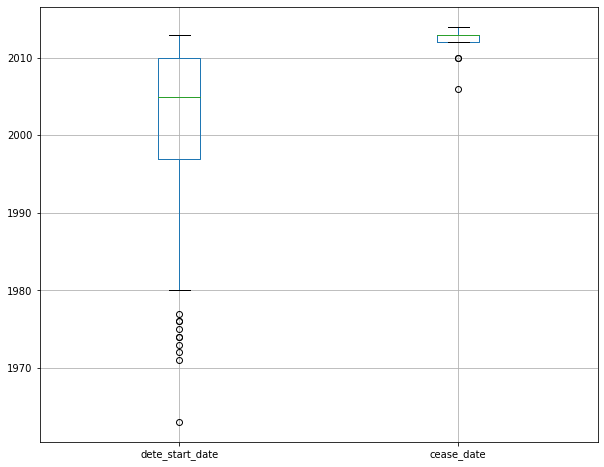

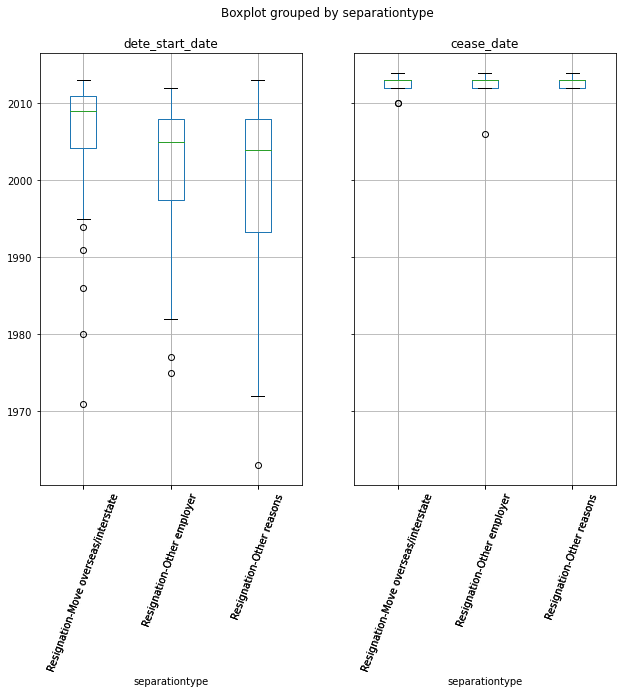

In [14]:
#visualizing year columns in dete_resignations dataframe
dete_resignations.boxplot(column=['dete_start_date','cease_date'], figsize=(10,8))
dete_resignations.boxplot(column=['dete_start_date','cease_date'], by='separationtype', fontsize=10, rot=70, figsize=(10,8))

<AxesSubplot:>

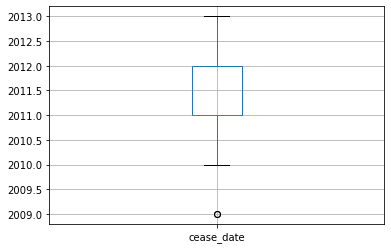

In [15]:
#visualizing year column in tafe_resignations dataframe
tafe_resignations.boxplot(column='cease_date')

We can verify:

* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

### Creating a new column

In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### Identifying Employees who resigned due to dissatisfaction

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

`tafe_resignations` dataframe:

* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

`dete_resignations` dataframe:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [17]:
# for 'dete_resignations' dataframe
dete_dissatisfaction_resignation_indicators=[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
]

'''
Faster implementation:
dete_dissatisfaction_resignation_mask=dete_resignations[dete_dissatisfaction_resignation_indicators].sum(axis=1) >=1
dete_resignations['dissatisfied']=dete_dissatisfaction_resignation_mask
dete_resignations_up=dete_resignations.copy()
'''

dete_resignations['dissatisfied']=dete_resignations[dete_dissatisfaction_resignation_indicators].any(axis=1, skipna=False)
dete_resignations_up=dete_resignations.copy()

In [18]:
# for 'tafe_resignations' dataframe
tafe_dissatisfaction_resignation_indicators=[
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]

print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

def update_vals(answer):
    if pd.isnull(answer):
        return np.nan
    elif answer == '-':
        return False
    else:
        return True

tafe_resignations[tafe_dissatisfaction_resignation_indicators]=tafe_resignations[tafe_dissatisfaction_resignation_indicators].applymap(update_vals)

print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

tafe_resignations['dissatisfied']=tafe_resignations[tafe_dissatisfaction_resignation_indicators].any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()


-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


### Combining the dataframes

In [19]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [20]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up])
combined_updated=combined.dropna(axis=1, thresh=500)

### Cleaning the `institute_service` column

In [21]:
print(combined_updated['institute_service'].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [22]:
combined_updated.loc[:,'institute_service']=combined_updated.loc[:,'institute_service'].astype(str)
combined_updated['institute_service']

C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5-6
697     1-2
698     nan
699     5-6
701     3-4
Name: institute_service, Length: 651, dtype: object

In [23]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

<ipython-input-23-87128c28e097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
<ipython-input-23-87128c28e097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [24]:
# Convert years of service to career stage
def map_to_career_stage(service):
    if service >=11:
        return 'Veteran'
    elif 7<=service<11:
        return 'Established'
    elif 3<=service<6:
        return 'Experienced'
    elif pd.isnull(service):
        return np.nan
    else:
        return "New"

combined_updated['service_cat']=combined_updated['institute_service_up'].apply(map_to_career_stage)

# Quick check of the update
combined_updated['service_cat'].value_counts()

<ipython-input-24-295baf831a38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat']=combined_updated['institute_service_up'].apply(map_to_career_stage)


New            210
Experienced    155
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Performing Initial Analysis

In [25]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<ipython-input-26-66bf6a3c9dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


<AxesSubplot:xlabel='service_cat'>

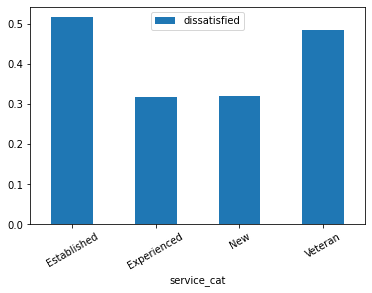

In [27]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

# Plot the results
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.